In [5]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

from scipy.stats import shapiro, levene
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
from scipy import stats

In [3]:
df = pd.read_csv('ab_testing.csv', index_col=0)
df.head()

,Grupo,Ingresos
Fecha,,
2024-01-01,Control,524.835708
2024-01-02,Control,493.086785
2024-01-03,Control,532.384427
2024-01-04,Control,576.151493
2024-01-05,Control,488.292331


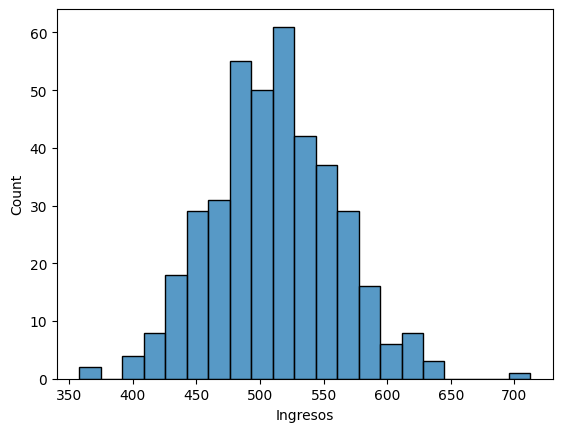

In [7]:
sns.histplot(x='Ingresos', data= df);

In [9]:
df.groupby('Grupo')['Ingresos'].mean()

Grupo
Control    497.961452
Test       524.293409
Name: Ingresos, dtype: float64

In [10]:
# lo primero que hacemos es crear una función para testar la normalidad de los datos
def normalidad(dataframe, columna):
    """
    Evalúa la normalidad de una columna de datos de un DataFrame utilizando la prueba de Shapiro-Wilk.

    Parámetros:
        dataframe (DataFrame): El DataFrame que contiene los datos.
        columna (str): El nombre de la columna en el DataFrame que se va a evaluar para la normalidad.

    Returns:
        None: Imprime un mensaje indicando si los datos siguen o no una distribución normal.
    """

    statistic, p_value = stats.shapiro(dataframe[columna])
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal.")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal.")

In [11]:
normalidad(df, 'Ingresos')

Para la columna Ingresos los datos siguen una distribución normal.


In [12]:
grupo_control = df[df["Grupo"] == "Control"]["Ingresos"]
grupo_test = df[df["Grupo"] == "Test"]["Ingresos"]

In [13]:
def homogeneidad (dataframe, columna, columna_metrica):
    
    """
    Evalúa la homogeneidad de las varianzas entre grupos para una métrica específica en un DataFrame dado.

    Parámetros:
    - dataframe (DataFrame): El DataFrame que contiene los datos.
    - columna (str): El nombre de la columna que se utilizará para dividir los datos en grupos.
    - columna_metrica (str): El nombre de la columna que se utilizará para evaluar la homogeneidad de las varianzas.

    Returns:
    No devuelve nada directamente, pero imprime en la consola si las varianzas son homogéneas o no entre los grupos.
    Se utiliza la prueba de Levene para evaluar la homogeneidad de las varianzas. Si el valor p resultante es mayor que 0.05,
    se concluye que las varianzas son homogéneas; de lo contrario, se concluye que las varianzas no son homogéneas.
    """
    
    # lo primero que tenemos que hacer es crear tantos conjuntos de datos para cada una de las categorías que tenemos, Control Campaign y Test Campaign
    valores_evaluar = []
    
    for valor in dataframe[columna].unique():
        valores_evaluar.append(dataframe[dataframe[columna]== valor][columna_metrica])

    statistic, p_value = stats.levene(*valores_evaluar)
    if p_value > 0.05:
        print(f"Para la métrica {columna_metrica} las varianzas son homogéneas entre grupos.")
    else:
        print(f"Para la métrica {columna_metrica}, las varianzas no son homogéneas entre grupos.")

In [14]:
homogeneidad(df, 'Grupo', 'Ingresos')

Para la métrica Ingresos las varianzas son homogéneas entre grupos.


In [15]:
_, p_value = ttest_ind(grupo_control, grupo_test, equal_var=True)
print(p_value)

7.204966637152151e-08
